In [1]:
import sys 
sys.path.append('..')
from ml.inklabel_dataset import InkLabelDataset
import yaml
import lightning as pl
from denoising_diffusion_pytorch import Unet, GaussianDiffusion
import torch
segment_ids = yaml.safe_load(open('../configs/segment_ids.yaml', 'r'))
print(segment_ids['segment_ids'])
segments = [segment_ids['segment_ids']['segments'][0]]
SAMPLE_SIZE = 32

{'segments': ['20231210121321', '20231106155350', '20231005123336', '20230820203112', '20230620230619', '20230826170124', '20230702185753', '20230522215721', '20230531193658', '20230520175435', '20230903193206', '20230902141231', '20231007101615', '20230929220924', 'recto', 'verso', '20231016151000', '20231012184423', '20231031143850']}


/home/npopkov/vesuvius_gcml/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = InkLabelDataset(segments,SAMPLE_SIZE)

Creating InkLabelDataset with 1 segments...


KeyboardInterrupt: 

In [ ]:
import numpy as np
print(np.unique(dataset.data[0]['inklabel']))

[0. 1.]


Dataset length: 11915
Sample 0: ink_label shape (32, 32), scroll_segment shape (16, 32, 32)
Sample 0 ink_label max value: 1.0
Sample 0 scroll_segment max value: 255


AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

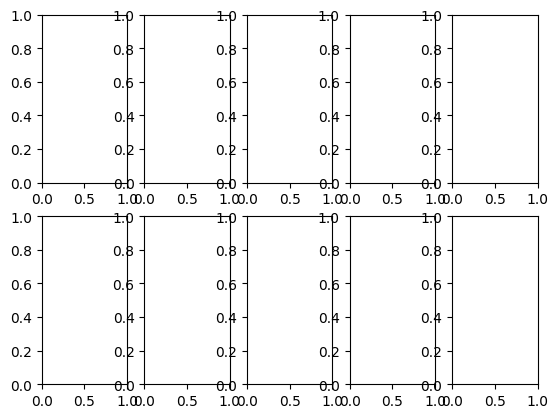

In [ ]:
dataset.__test__()

(16, 32, 32)


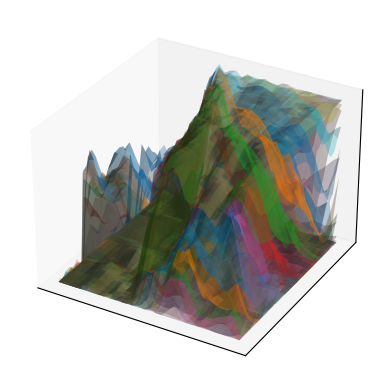

In [ ]:
#take each layer of the scroll_segment and plot them after each other in a 3d plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
print(dataset[0]['scroll_segment'].shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(np.arange(dataset[0]['scroll_segment'].shape[1]), np.arange(dataset[0]['scroll_segment'].shape[2]))
for i in range(dataset[0]['scroll_segment'].shape[0]):
    z = dataset[0]['scroll_segment'][i,:,:]
    ax.plot_surface(y, x, z, alpha=0.3)
    ax.grid(False)  
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    ax.axes.zaxis.set_ticks([])
plt.show()




